# Data Pre-processing
### Import library

In [27]:
import pandas as pd
import seaborn as snsm

In [2]:
riders = pd.read_csv("Riders.csv")
riders.head()
# Age is the numbers of days since the rider delivered the first order

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [3]:
riders.shape

(960, 5)

In [4]:
riders.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


In [5]:
riders.columns

Index(['Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'], dtype='object')

In [6]:
# Rename the column so that it is compatible with pandas's dot notation
riders = riders.rename(columns = {"Rider Id": "Rider_Id"})
riders.head()

,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [8]:
train = pd.read_csv("train.csv")
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [9]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

### *Change the columns name so that it is compatible with pandas*

In [10]:
columns = train.columns
new_columns = columns.str.replace("-", "")
new_columns = new_columns.str.replace("Mo = 1", "")
new_columns = new_columns.str.replace("()", "", regex = False)
new_columns = new_columns.str.replace(" ", "_")
train.columns = new_columns
train = train.rename(columns = {"Distance_(KM)": "Distance"})
train.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Precipitation_in_millimeters', 'Pickup_Lat',
       'Pickup_Long', 'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [11]:
train.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,...,Arrival_at_Destination__Time,Distance,Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


# Drop unnecessary columns 
- Vehicle_Type: Only Bike in this dataset 
- Lat and Long: Do not think it is necessary in our dataset. Moreover I do not know how to use Spacial data

In [12]:
train.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Precipitation_in_millimeters', 'Pickup_Lat',
       'Pickup_Long', 'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [13]:
columns_to_drop = ["Vehicle_Type", "Pickup_Lat", "Pickup_Long", "Destination_Lat", "Destination_Long"]
train.drop(columns_to_drop, axis = 1, inplace = True)
train.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,Confirmation__Time,...,Pickup__Weekday_,Pickup__Time,Arrival_at_Destination__Day_of_Month,Arrival_at_Destination__Weekday_,Arrival_at_Destination__Time,Distance,Temperature,Precipitation_in_millimeters,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,...,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,...,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,...,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,Rider_Id_770,1214


# **Merge** train data and riders data

In [14]:
df = pd.merge(train, riders, on = "Rider_Id")
df.shape

(21201, 28)

In [15]:
train.shape

(21201, 24)

### Shape looks good

In [16]:
df.head(10)

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,Confirmation__Time,...,Arrival_at_Destination__Time,Distance,Temperature,Precipitation_in_millimeters,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,10:39:55 AM,4,20.4,NaN,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,...,5:01:43 PM,20,24.5,NaN,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,...,2:16:43 PM,6,24.7,NaN,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,...,8:28:32 AM,18,15.2,NaN,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,...,11:26:22 AM,7,19.2,NaN,Rider_Id_432,1602,1637,1309,13.8,549
5,Order_No_10440,User_Id_2801,3,Business,29,3,12:14:43 PM,29,3,12:15:51 PM,...,1:03:43 PM,26,NaN,NaN,Rider_Id_432,2313,1637,1309,13.8,549
6,Order_No_25321,User_Id_1882,1,Business,2,2,9:08:42 AM,2,2,9:08:57 AM,...,10:05:05 AM,8,15.2,NaN,Rider_Id_432,1638,1637,1309,13.8,549
7,Order_No_2476,User_Id_2260,1,Personal,19,5,4:12:56 PM,19,5,4:16:19 PM,...,5:10:58 PM,7,24.5,NaN,Rider_Id_432,1897,1637,1309,13.8,549
8,Order_No_14704,User_Id_2186,1,Personal,28,1,3:03:10 PM,28,1,3:04:38 PM,...,4:00:44 PM,11,24.3,NaN,Rider_Id_432,1698,1637,1309,13.8,549
9,Order_No_118,User_Id_3688,3,Business,14,4,2:42:58 PM,14,4,2:44:37 PM,...,4:13:52 PM,12,27.5,NaN,Rider_Id_432,2693,1637,1309,13.8,549


### <font color='#eb3483'> Duplicates </font>

In [17]:
df[df.duplicated()].shape

(0, 28)

#### No duplicates found!!! Great! 

### <font color='#eb3483'> Missing Values </font>

In [18]:
df.isna().sum()/df.shape[0] # proportion missing in each column

Order_No                                0.000000
User_Id                                 0.000000
Platform_Type                           0.000000
Personal_or_Business                    0.000000
Placement__Day_of_Month                 0.000000
Placement__Weekday_                     0.000000
Placement__Time                         0.000000
Confirmation__Day_of_Month              0.000000
Confirmation__Weekday_                  0.000000
Confirmation__Time                      0.000000
Arrival_at_Pickup__Day_of_Month         0.000000
Arrival_at_Pickup__Weekday_             0.000000
Arrival_at_Pickup__Time                 0.000000
Pickup__Day_of_Month                    0.000000
Pickup__Weekday_                        0.000000
Pickup__Time                            0.000000
Arrival_at_Destination__Day_of_Month    0.000000
Arrival_at_Destination__Weekday_        0.000000
Arrival_at_Destination__Time            0.000000
Distance                                0.000000
Temperature         

In [21]:
df.drop(["Precipitation_in_millimeters"], axis = 1, inplace = True)
df.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,Confirmation__Time,...,Arrival_at_Destination__Weekday_,Arrival_at_Destination__Time,Distance,Temperature,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,5,10:39:55 AM,4,20.4,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,...,5,5:01:43 PM,20,24.5,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,...,5,2:16:43 PM,6,24.7,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,...,2,8:28:32 AM,18,15.2,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,...,2,11:26:22 AM,7,19.2,Rider_Id_432,1602,1637,1309,13.8,549


#### We could see that precipitation is missing a lot, DROP the column
- This Dataset only includes one that are carried by Bike. People might not use Bike when it is raining
- Since the data set significantly lacks Precipitation, DROP this variable
- Temperature is missing 20% of the data. Might be because they did not measured it

## Analysis 
Look for/take note of any correlations or explicit trends in the following variables (linear/non-linear relationship, outliers, or no correlation at all) <br> 
- *Total travel time of a given package VS. the total distance in km between the pickup point and the dropoff point*

- The average time a rider takes on any given package (you might have to search for a rider id among the orders dataset, then compare the times) VS. the average rating that same rider has

- The number of orders a given rider takes on in a given day (same scenario as above, might have to search for specific rider then compare times within the same day) VS. the total time taken between orders (looking for possible fatigue from consecutive orders that affects delivery times)

### Graph the total travel time and total distance using seaborn

In [22]:
df.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,Confirmation__Time,...,Arrival_at_Destination__Weekday_,Arrival_at_Destination__Time,Distance,Temperature,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,5,10:39:55 AM,4,20.4,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,...,5,5:01:43 PM,20,24.5,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,...,5,2:16:43 PM,6,24.7,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,...,2,8:28:32 AM,18,15.2,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,...,2,11:26:22 AM,7,19.2,Rider_Id_432,1602,1637,1309,13.8,549


### Distribution of distance

<AxesSubplot:xlabel='Distance', ylabel='Count'>

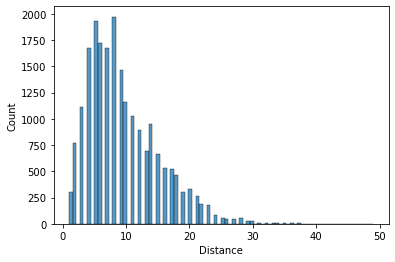

In [23]:
sns.histplot(data = df,  x = "Distance")

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

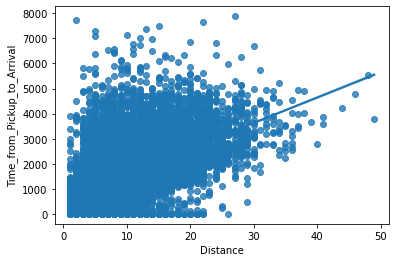

In [25]:
sns.regplot(data = df, y = "Time_from_Pickup_to_Arrival", x = "Distance")

### *We could draw a regression line but it is not that obvious. Also, the time varies a lot despite the distance being the same*

### Look at the distribution of each variables

In [31]:
df.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,Confirmation__Time,...,Arrival_at_Destination__Weekday_,Arrival_at_Destination__Time,Distance,Temperature,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,5,10:39:55 AM,4,20.4,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,...,5,5:01:43 PM,20,24.5,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,...,5,2:16:43 PM,6,24.7,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,...,2,8:28:32 AM,18,15.2,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,...,2,11:26:22 AM,7,19.2,Rider_Id_432,1602,1637,1309,13.8,549


In [382]:
number_of_orders_per_day = df.Placement__Weekday_.value_counts().sort_index()
number_of_orders_per_day

1    3789
2    3959
3    3823
4    4228
5    3993
6    1223
7     186
Name: Placement__Weekday_, dtype: int64

## *Number of orders per day*

<AxesSubplot:xlabel='Placement__Weekday_', ylabel='Count'>

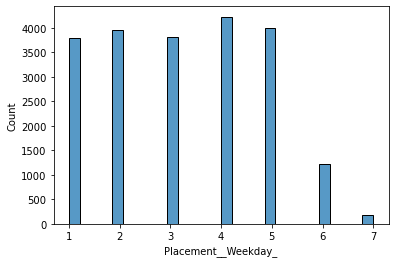

In [32]:
sns.histplot(data = df, x = "Placement__Weekday_")

### We could see that most of the orders are placed on weekdays
### Maybe we could groupby days and see the average and sum in those

#### Calculate number of riders are there per day

In [284]:
number_of_rider_per_day = df.groupby(["Placement__Weekday_"])["Rider_Id"].nunique()
number_of_rider_per_day = number_of_rider_per_day.values
number_of_rider_per_day

array([698, 702, 712, 713, 713, 434, 101])

#### Group by weekdays

In [384]:
groupby_weekday_df = df.groupby("Placement__Weekday_").agg(["mean", "sum"])
groupby_weekday = groupby_weekday_df[["Distance", "Time_from_Pickup_to_Arrival"]]
groupby_weekday.reset_index(inplace=True)
groupby_weekday

/var/folders/sb/873k54ys2gb7vsfsg26nqk200000gn/T/ipykernel_23968/3228331123.py:1: FutureWarning: ['Order_No', 'User_Id', 'Personal_or_Business', 'Placement__Time', 'Confirmation__Time', 'Arrival_at_Pickup__Time', 'Pickup__Time', 'Arrival_at_Destination__Time', 'Rider_Id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  groupby_weekday_df = df.groupby("Placement__Weekday_").agg(["mean", "sum"])


Placement__Weekday_   Distance        Time_from_Pickup_to_Arrival         
                            mean    sum                        mean      sum
0                   1   9.609660  36411                 1496.081288  5668652
1                   2   9.429149  37330                 1589.976257  6294716
2                   3   9.564740  36566                 1573.379545  6015030
3                   4   9.330653  39450                 1556.106197  6579217
4                   5   9.447032  37722                 1595.178813  6369549
5                   6   9.775143  11955                 1445.685200  1768073
6                   7  11.365591   2114                 1683.032258   313044

In [385]:
groupby_weekday["Number_of_riders"] = number_of_rider_per_day.tolist()
groupby_weekday["Number_of_orders"] = number_of_orders_per_day.tolist()
groupby_weekday

/var/folders/sb/873k54ys2gb7vsfsg26nqk200000gn/T/ipykernel_23968/2005178390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupby_weekday["Number_of_riders"] = number_of_rider_per_day.tolist()
/var/folders/sb/873k54ys2gb7vsfsg26nqk200000gn/T/ipykernel_23968/2005178390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupby_weekday["Number_of_orders"] = number_of_orders_per_day.tolist()


Placement__Weekday_   Distance        Time_from_Pickup_to_Arrival           \
                            mean    sum                        mean      sum   
0                   1   9.609660  36411                 1496.081288  5668652   
1                   2   9.429149  37330                 1589.976257  6294716   
2                   3   9.564740  36566                 1573.379545  6015030   
3                   4   9.330653  39450                 1556.106197  6579217   
4                   5   9.447032  37722                 1595.178813  6369549   
5                   6   9.775143  11955                 1445.685200  1768073   
6                   7  11.365591   2114                 1683.032258   313044   

  Number_of_riders Number_of_orders  
                                     
0              698             3789  
1              702             3959  
2              712             3823  
3              713             4228  
4              713             3993  
5              434             1223  
6              101              186

In [386]:
groupby_weekday.columns = groupby_weekday.columns.map('_'.join)
groupby_weekday.columns

Index(['Placement__Weekday__', 'Distance_mean', 'Distance_sum',
       'Time_from_Pickup_to_Arrival_mean', 'Time_from_Pickup_to_Arrival_sum',
       'Number_of_riders_', 'Number_of_orders_'],
      dtype='object')

In [387]:
groupby_weekday

,Placement__Weekday__,Distance_mean,Distance_sum,Time_from_Pickup_to_Arrival_mean,Time_from_Pickup_to_Arrival_sum,Number_of_riders_,Number_of_orders_
0,1,9.609660,36411,1496.081288,5668652,698,3789
1,2,9.429149,37330,1589.976257,6294716,702,3959
2,3,9.564740,36566,1573.379545,6015030,712,3823
3,4,9.330653,39450,1556.106197,6579217,713,4228
4,5,9.447032,37722,1595.178813,6369549,713,3993
5,6,9.775143,11955,1445.685200,1768073,434,1223
6,7,11.365591,2114,1683.032258,313044,101,186


In [405]:
# Speeed = distance / time
# Distance_mean => Average distance covered per order
# Time_from_Pickup_to_Arrival_mean => Average time per order
avg_speed_per_day = groupby_weekday.Distance_mean / (groupby_weekday.Time_from_Pickup_to_Arrival_mean/3600)
print("Average Speed per day")
print(avg_speed_per_day)

Average Speed per day
0    23.123593
1    21.349335
2    21.884779
3    21.586155
4    21.320065
5    24.341755
6    24.310959
dtype: float64


### Average Speed per person is faster on weekends

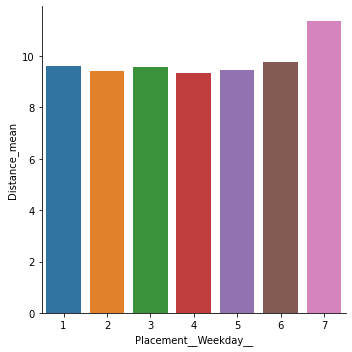

In [406]:
sns.catplot(data = avg_by_weekday, x = "Placement__Weekday__", y = "Distance_mean", kind = "bar") 

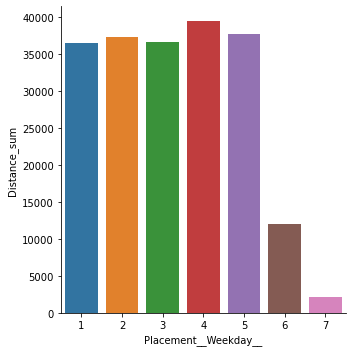

In [319]:
sns.catplot(data = avg_by_weekday, x = "Placement__Weekday__", y = "Distance_sum", kind = "bar") 

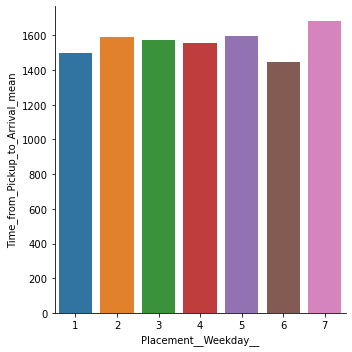

In [320]:
sns.catplot(data = avg_by_weekday, x = "Placement__Weekday__", y = "Time_from_Pickup_to_Arrival_mean", kind = "bar")

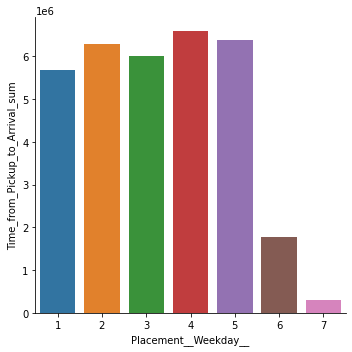

In [321]:
sns.catplot(data = avg_by_weekday, x = "Placement__Weekday__", y = "Time_from_Pickup_to_Arrival_sum", kind = "bar")

<AxesSubplot:xlabel='Placement__Day_of_Month', ylabel='Count'>

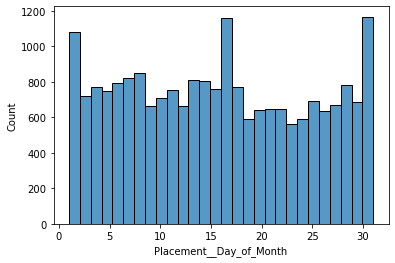

In [278]:
sns.histplot(data = df, x = "Placement__Day_of_Month")

### Hmm this is kind of interesting, a lot of orders are placed on the 1th, 15th and 30th

In [407]:
groupby_day_df = df.groupby("Placement__Day_of_Month").agg(["mean", "sum"])
groupby_day = groupby_day = groupby_day_df[["Distance", "Time_from_Pickup_to_Arrival"]]
groupby_day

/var/folders/sb/873k54ys2gb7vsfsg26nqk200000gn/T/ipykernel_23968/1931874337.py:1: FutureWarning: ['Order_No', 'User_Id', 'Personal_or_Business', 'Placement__Time', 'Confirmation__Time', 'Arrival_at_Pickup__Time', 'Pickup__Time', 'Arrival_at_Destination__Time', 'Rider_Id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  groupby_day_df = df.groupby("Placement__Day_of_Month").agg(["mean", "sum"])


Distance       Time_from_Pickup_to_Arrival         
                             mean   sum                        mean      sum
Placement__Day_of_Month                                                     
1                        9.798755  4723                 1561.139004   752469
2                        9.335548  5620                 1537.162791   925372
3                        9.332869  6701                 1537.409471  1103860
4                        9.565670  7356                 1589.240572  1222126
5                        9.258367  6916                 1515.706827  1132233
6                        9.812343  7791                 1578.428212  1253272
7                        9.498783  7808                 1584.419708  1302393
8                        9.820755  8328                 1650.161557  1399337
9                        9.593703  6399                 1636.578711  1091598
10                       9.729196  6898                 1589.863188  1127213
11                       9.859043  7414                 1550.751330  1166165
12                       9.602102  6395                 1596.331832  1063157
13                       9.377312  7605                 1559.843403  1265033
14                       9.534826  7666                 1589.348259  1277836
15                       9.475066  7220                 1544.060367  1176574
16                       9.083186  5132                 1470.899115   831058
17                       9.408094  5579                 1494.674536   886342
18                       9.425228  7248                 1581.717815  1216341
19                       9.196944  5417                 1551.650255   913922
20                       9.656299  6209                 1578.175739  1014767
21                       9.627119  6248                 1587.523883  1030303
22                       9.776923  6355                 1532.955385   996421
23                       9.561279  5383                 1539.912966   866971
24                       8.912014  5267                 1480.967851   875252
25                       9.395080  6492                 1517.675832  1048714
26                       8.940532  5713                 1536.123631   981583
27                       9.902985  6635                 1494.273134  1001163
28                       9.533163  7474                 1550.485969  1215581
29                       9.493431  6503                 1505.281752  1031118
30                       9.442577  6742                 1602.392157  1144108
31                       9.516556  4311                 1536.421634   695999

In [408]:
order_per_day = df.Placement__Day_of_Month.value_counts().sort_index()
order_per_day

1     482
2     602
3     718
4     769
5     747
6     794
7     822
8     848
9     667
10    709
11    752
12    666
13    811
14    804
15    762
16    565
17    593
18    769
19    589
20    643
21    649
22    650
23    563
24    591
25    691
26    639
27    670
28    784
29    685
30    714
31    453
Name: Placement__Day_of_Month, dtype: int64

In [409]:
groupby_day["Order_per_day"] = order_per_day
groupby_day

/var/folders/sb/873k54ys2gb7vsfsg26nqk200000gn/T/ipykernel_23968/603227162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupby_day["Order_per_day"] = order_per_day


Distance       Time_from_Pickup_to_Arrival           \
                             mean   sum                        mean      sum   
Placement__Day_of_Month                                                        
1                        9.798755  4723                 1561.139004   752469   
2                        9.335548  5620                 1537.162791   925372   
3                        9.332869  6701                 1537.409471  1103860   
4                        9.565670  7356                 1589.240572  1222126   
5                        9.258367  6916                 1515.706827  1132233   
6                        9.812343  7791                 1578.428212  1253272   
7                        9.498783  7808                 1584.419708  1302393   
8                        9.820755  8328                 1650.161557  1399337   
9                        9.593703  6399                 1636.578711  1091598   
10                       9.729196  6898                 1589.863188  1127213   
11                       9.859043  7414                 1550.751330  1166165   
12                       9.602102  6395                 1596.331832  1063157   
13                       9.377312  7605                 1559.843403  1265033   
14                       9.534826  7666                 1589.348259  1277836   
15                       9.475066  7220                 1544.060367  1176574   
16                       9.083186  5132                 1470.899115   831058   
17                       9.408094  5579                 1494.674536   886342   
18                       9.425228  7248                 1581.717815  1216341   
19                       9.196944  5417                 1551.650255   913922   
20                       9.656299  6209                 1578.175739  1014767   
21                       9.627119  6248                 1587.523883  1030303   
22                       9.776923  6355                 1532.955385   996421   
23                       9.561279  5383                 1539.912966   866971   
24                       8.912014  5267                 1480.967851   875252   
25                       9.395080  6492                 1517.675832  1048714   
26                       8.940532  5713                 1536.123631   981583   
27                       9.902985  6635                 1494.273134  1001163   
28                       9.533163  7474                 1550.485969  1215581   
29                       9.493431  6503                 1505.281752  1031118   
30                       9.442577  6742                 1602.392157  1144108   
31                       9.516556  4311                 1536.421634   695999   

                        Order_per_day  
                                       
Placement__Day_of_Month                
1                                 482  
2                                 602  
3                                 718  
4                                 769  
5                                 747  
6                                 794  
7                                 822  
8                                 848  
9                                 667  
10                                709  
11                                752  
12                                666  
13                                811  
14                                804  
15                                762  
16                                565  
17                                593  
18                                769  
19                                589  
20                                643  
21                                649  
22                                650  
23                                563  
24                                591  
25                                691  
26                                639  
27                                670  
28                                784  
29                                685  
30                      

In [410]:
groupby_day.reset_index()
groupby_day.columns = groupby_day.columns.map('_'.join)
groupby_day

,Distance_mean,Distance_sum,Time_from_Pickup_to_Arrival_mean,Time_from_Pickup_to_Arrival_sum,Order_per_day_
Placement__Day_of_Month,,,,,
1,9.798755,4723,1561.139004,752469,482
2,9.335548,5620,1537.162791,925372,602
3,9.332869,6701,1537.409471,1103860,718
4,9.565670,7356,1589.240572,1222126,769
5,9.258367,6916,1515.706827,1132233,747
6,9.812343,7791,1578.428212,1253272,794
7,9.498783,7808,1584.419708,1302393,822
8,9.820755,8328,1650.161557,1399337,848
9,9.593703,6399,1636.578711,1091598,667


## Question
- ###  If the distance is similar why are there so much variation in Time from pickup to arrival. We can investigate that more
- ###  Might be because of the riders experience? => If so we can *groupby* riders

In [415]:
Avg_by_rider = df.groupby("Rider_Id")[["Distance", "Time_from_Pickup_to_Arrival", "Average_Rating", "No_Of_Orders", "Age", "Temperature"]].agg("mean")
Avg_by_rider

,Distance,Time_from_Pickup_to_Arrival,Average_Rating,No_Of_Orders,Age,Temperature
Rider_Id,,,,,,
Rider_Id_0,12.000000,1393.000000,14.0,3048.0,2570.0,26.400000
Rider_Id_1,11.000000,1333.000000,0.0,8.0,589.0,25.000000
Rider_Id_10,9.490196,529.098039,13.3,6978.0,1990.0,23.248780
Rider_Id_100,8.171717,1271.929293,13.4,362.0,910.0,21.940000
Rider_Id_101,10.491803,1755.579235,13.1,1299.0,986.0,21.976774
...,...,...,...,...,...,...
Rider_Id_959,8.956522,1556.086957,13.7,275.0,379.0,25.418182
Rider_Id_96,9.817308,1485.163462,14.8,713.0,726.0,23.615217
Rider_Id_97,10.571429,965.857143,13.5,5694.0,2419.0,22.880000


### From this data frame we can calculate how much time each rider take per km on average

In [416]:
time_per_km

Rider_Id
Rider_Id_0      116.083333
Rider_Id_1      121.181818
Rider_Id_10      55.752066
Rider_Id_100    155.650185
Rider_Id_101    167.328646
                   ...    
Rider_Id_959    173.737864
Rider_Id_96     151.280118
Rider_Id_97      91.364865
Rider_Id_98     137.100000
Rider_Id_99     175.952128
Length: 924, dtype: float64

In [417]:
time_per_km = Avg_by_rider.Time_from_Pickup_to_Arrival / Avg_by_rider.Distance
average_speed = Avg_by_rider.Distance / Avg_by_rider.Time_from_Pickup_to_Arrival
Avg_by_rider["Time_per_km"] = time_per_km
Avg_by_rider["Average_speed"] = average_speed
Avg_by_rider.head()

,Distance,Time_from_Pickup_to_Arrival,Average_Rating,No_Of_Orders,Age,Temperature,Time_per_km,Average_speed
Rider_Id,,,,,,,,
Rider_Id_0,12.000000,1393.000000,14.0,3048.0,2570.0,26.400000,116.083333,0.008615
Rider_Id_1,11.000000,1333.000000,0.0,8.0,589.0,25.000000,121.181818,0.008252
Rider_Id_10,9.490196,529.098039,13.3,6978.0,1990.0,23.248780,55.752066,0.017937
Rider_Id_100,8.171717,1271.929293,13.4,362.0,910.0,21.940000,155.650185,0.006425
Rider_Id_101,10.491803,1755.579235,13.1,1299.0,986.0,21.976774,167.328646,0.005976


<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

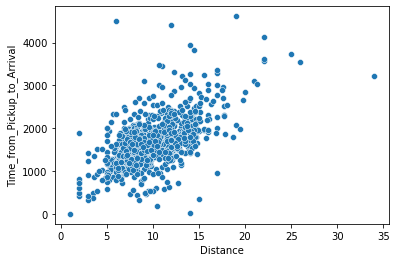

In [418]:
sns.scatterplot(data = Avg_by_rider,  x = "Distance", y = "Time_from_Pickup_to_Arrival")

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

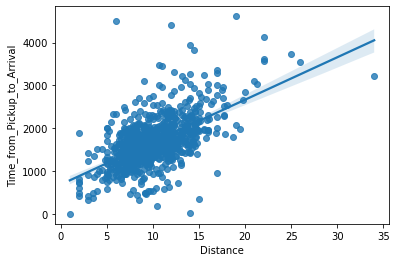

In [355]:
sns.regplot(data = Avg_by_rider,  x = "Distance", y = "Time_from_Pickup_to_Arrival")

<AxesSubplot:xlabel='Age', ylabel='Average_speed'>

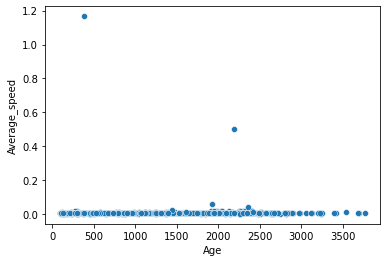

In [419]:
sns.scatterplot(data = Avg_by_rider, x = "Age", y = "Average_speed") 

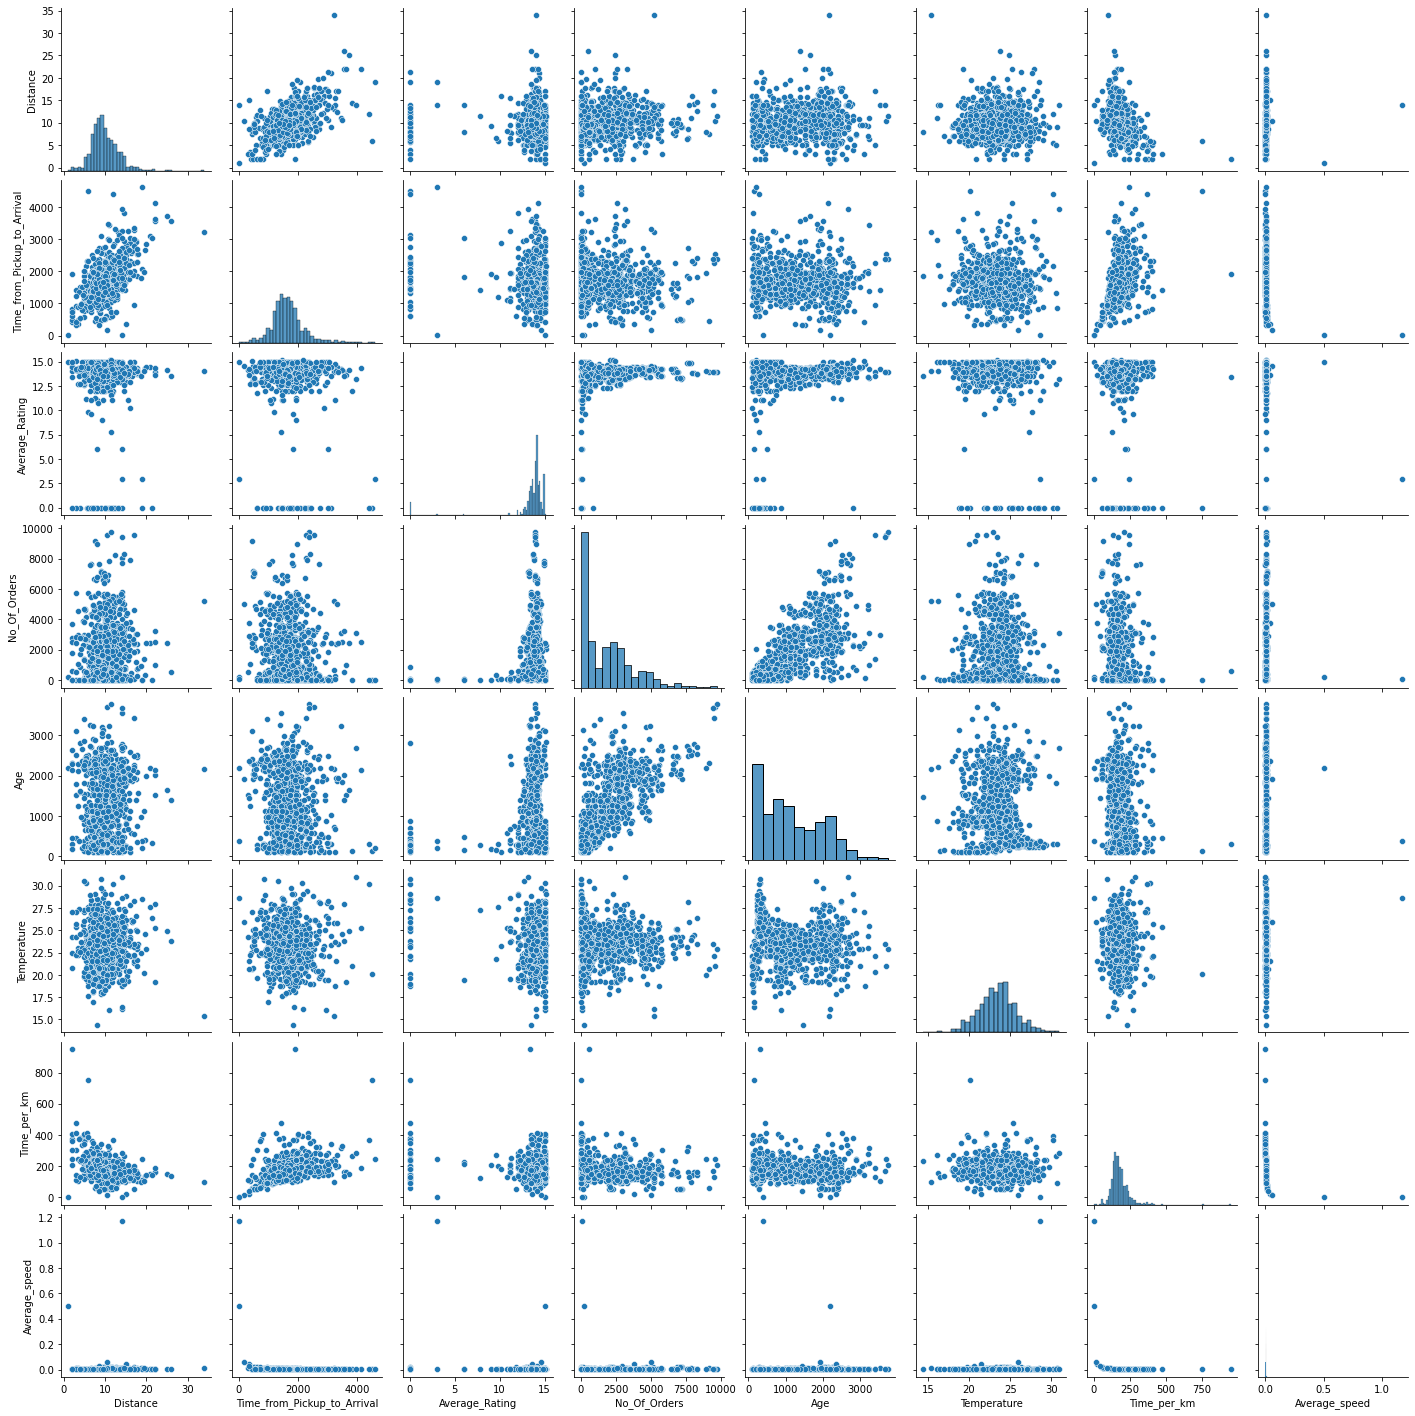

In [359]:
sns.pairplot(data = Avg_by_rider)

In [ ]:
df.columns

In [ ]:
(df.Distance < 20).value_counts()

In [ ]:
df_dislessthan20 = df[df.Distance < 20]
df_dislessthan20

In [ ]:
Avg_order_by_rider = df.groupby("Rider_Id")[["Time_from_Pickup_to_Arrival", "No_Of_Orders"]].agg("mean")
Avg_order_by_rider
sns.scatterplot(data = Avg_order_by_rider,  x = "No_Of_Orders", y = "Time_from_Pickup_to_Arrival")

# Further analysis
### Look at AM and PM: Time, Rush hour and weekend hour could affect the time 
### Groupby Time and compare the time per km

### Geospacial analysis 
### traffic can be bad in some of the area.
### Drivers might be concentrated in one part of the area